In [39]:
import numpy as np
from numpy import random
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [29]:
train = pd.read_csv("train.csv", index_col = None)
y = train[['LABELS']]
x = train.drop('LABELS', axis=1)
xMean = x.mean()
x = x.fillna(xMean)
test_nolabels = pd.read_csv("test_nolabels.csv", index_col = None)
test_nolabels = test_nolabels.fillna(xMean)

In [ ]:
ndvi_list = {'NDVI_jan','NDVI_feb','NDVI_mar','NDVI_apr','NDVI_may','NDVI_jun','NDVI_jul','NDVI_aug','NDVI_sep','NDVI_oct','NDVI_nov','NDVI_dec'}
ndviDF = x[ndvi_list]
# ndviDF['LABELS'] = y['LABELS']
print(ndviDF.head(10))

In [30]:
toposElevation = {"topo_elevation_jan",'topo_elevation_feb','topo_elevation_mar','topo_elevation_apr','topo_elevation_jun','topo_elevation_jul','topo_elevation_aug','topo_elevation_sep','topo_elevation_oct','topo_elevation_nov','topo_elevation_dec'}
topoSlope = {'topo_slope_jan','topo_slope_feb','topo_slope_mar','topo_slope_apr','topo_slope_may','topo_slope_aug','topo_slope_jun','topo_slope_jul','topo_slope_sep','topo_slope_oct','topo_slope_nov','topo_slope_dec'}
topoElevationDF = x[toposElevation]
topoElevationMean = topoElevationDF.mean(axis=1)
x = x.drop(toposElevation,axis=1)
x['topoElevationMean'] = topoElevationMean
topoSlopeDF = x[topoSlope]
topoSlopeMean = topoSlopeDF.mean(axis=1)
x = x.drop(topoSlope, axis=1)
x['topoSlope'] = topoElevationMean



In [31]:
x_train, x_validation, y_train, y_validation = train_test_split( x,y, test_size=0.2)

In [40]:
## modle evaluation
def metric_RocAuc(y_probability, y_validation, estimator_name):
    '''
    Calculate and plt ROC metric
    @argument: y_probability : the probability class=1.
    @argument: y_validation: True labels.
    fpr, tpr = false_positive, true_positive.
    Return: "false_positive" and "true_positive", ROC_auc metric.
    '''
    fpr, tpr, _ = roc_curve(y_validation, y_probability) 
    roc_auc = auc(fpr, tpr)
    fig, axes = plt.subplots(constrained_layout=True,figsize=(5,3), dpi=150)
    fig.suptitle(estimator_name)
    axes.plot([0, 1], [0, 1], color= 'k',linestyle="--") # perfect fit 
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                       estimator_name=estimator_name)
    display.plot(ax=axes)
    return fpr, tpr, roc_auc

## Show some evaluation criteria on the clasifier
def evaluate_model(x_train, y_train, x_validation, y_validation, classifier):
    features = x_train.columns
    validation_Prediction = classifier.predict(x_validation)
    validation_PredictedProb = classifier.predict_proba(x_validation)[:, 1]
    ### ROC metric and curve #####
    clasifierName = type(classifier).__name__
    metric_RocAuc(validation_PredictedProb, y_validation,clasifierName)
    fi_model = pd.DataFrame({'feature': features,
                   'importance': classifier.feature_importances_}).\
                    sort_values('importance', ascending = False)
    clasifierNameExtended = clasifierName + "_info_fi"     
    fi_model.to_csv(clasifierNameExtended, index = None)
    return fi_model

In [ ]:
classifier = joblib.load("rf_RandomSearch.pkl")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
# recording[str(i)] = accuracy
print(str(i) + "_Accuracy: %.2f%%" % (accuracy))
evaluate_model(x_train, y_train, x_validation, y_validation, classifier)

NDVI_feb_Accuracy: 0.79%


,feature,importance
80,topo_elevation_may,0.061567
195,topoSlope,0.054310
194,topoElevationMean,0.048769
175,ERA5_temperature_2m_nov,0.047595
14,ERA5_temperature_2m_jan,0.045148
...,...,...
27,S2_B12_feb,0.000201
136,S2_B8_sep,0.000176
57,S2_B9_apr,0.000166
122,S2_B9_aug,0.000158


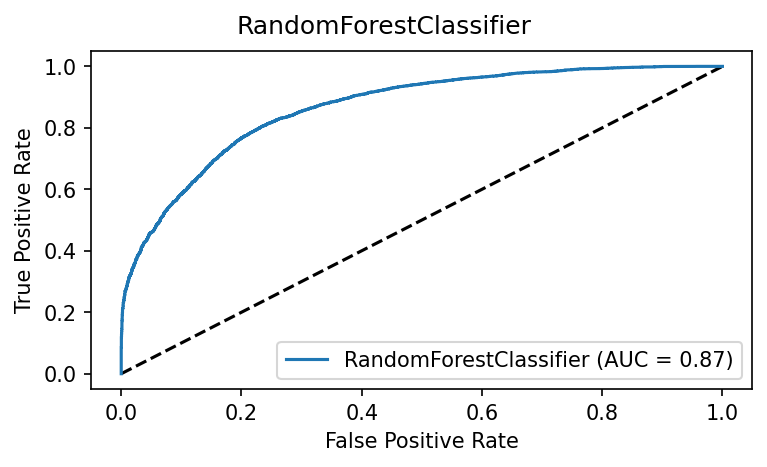

In [41]:
print(str(i) + "_Accuracy: %.2f%%" % (accuracy))
evaluate_model(x_train, y_train, x_validation, y_validation, classifier)